# Exploración de Datos FIFA22

# 1. Introducción

Este análisis tiene como objetivo explorar el conjunto de datos de FIFA22, 
centrándose en variables clave como el potencial, salario, reputación, valor de mercado y estatura de los jugadores.

# 2. Carga y exploración inicial de datos


In [43]:
# 2.1 Importación de librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import kagglehub
import os

In [44]:
# 2.2 Carga del dataset

current_folder = os.getcwd()

pickle_dir = os.path.join(current_folder, "data")
if not os.path.exists(pickle_dir):
    os.makedirs(pickle_dir)
pickle_file = os.path.join(pickle_dir, "players_22.pkl")

if os.path.exists(pickle_file):
    print(f"The pickle file already exists at: {pickle_file}")
else:
    os.environ["KAGGLEHUB_CACHE"] = current_folder + "/kagglehub_cache"
    path = kagglehub.dataset_download(
        "stefanoleone992/fifa-22-complete-player-dataset"
    )
    print("Downloaded path: ", path)
    output_file = os.path.join(path, "players_22.csv")
    pd.read_csv(output_file).to_pickle(pickle_file)

df = pd.read_pickle(pickle_file)

The pickle file already exists at: /home/julihocc/tec3d.worktrees/v1.0.0/data/players_22.pkl


In [45]:
# 2.3 Exploración inicial
df.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19239 entries, 0 to 19238
Columns: 110 entries, sofifa_id to nation_flag_url
dtypes: float64(16), int64(44), object(50)
memory usage: 16.1+ MB


In [47]:
df.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [48]:
# 2.4 Identificación de valores nulos
df.isnull().sum()

sofifa_id               0
player_url              0
short_name              0
long_name               0
player_positions        0
                    ...  
player_face_url         0
club_logo_url          61
club_flag_url          61
nation_logo_url     18480
nation_flag_url         0
Length: 110, dtype: int64

# 3. Análisis exploratorio (EDA)

## 3.1 Distribución de características físicas y económicas

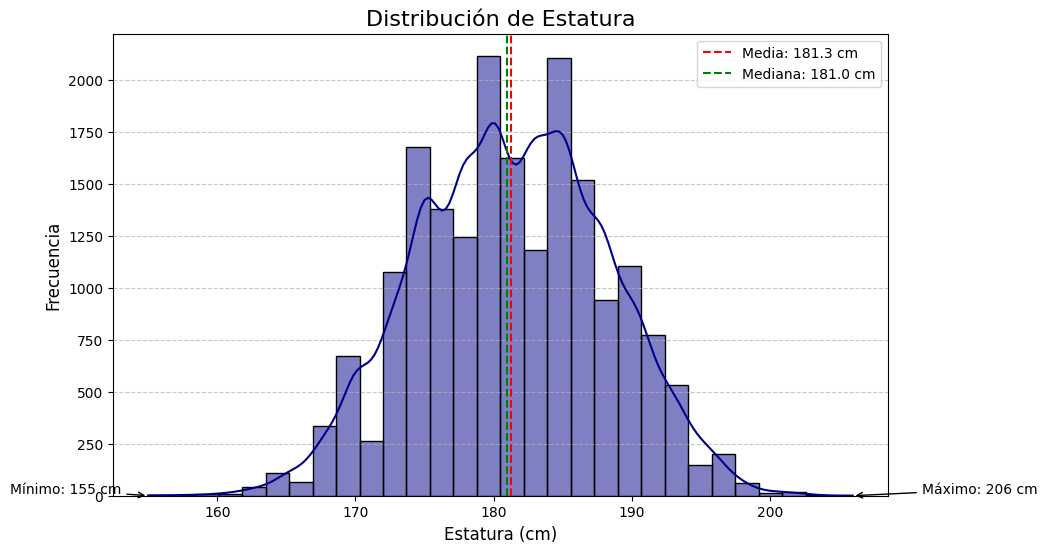

In [49]:
# Calculate key statistics
mean_height = df["height_cm"].mean()
median_height = df["height_cm"].median()
max_height = df["height_cm"].max()
min_height = df["height_cm"].min()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df["height_cm"], kde=True, bins=30, alpha=0.5, edgecolor="black", color="darkblue")

# Add vertical lines for mean and median
plt.axvline(mean_height, color="red", linestyle="--", label=f"Media: {mean_height:.1f} cm")
plt.axvline(median_height, color="green", linestyle="--", label=f"Mediana: {median_height:.1f} cm")

# Annotate max and min values
plt.annotate(f"Máximo: {max_height} cm", xy=(max_height, 0), xytext=(max_height + 5, 10),
             arrowprops=dict(facecolor="black", arrowstyle="->"))
plt.annotate(f"Mínimo: {min_height} cm", xy=(min_height, 0), xytext=(min_height - 10, 10),
             arrowprops=dict(facecolor="black", arrowstyle="->"))

# Add labels, title, grid, and legend
plt.title("Distribución de Estatura", fontsize=16)
plt.xlabel("Estatura (cm)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

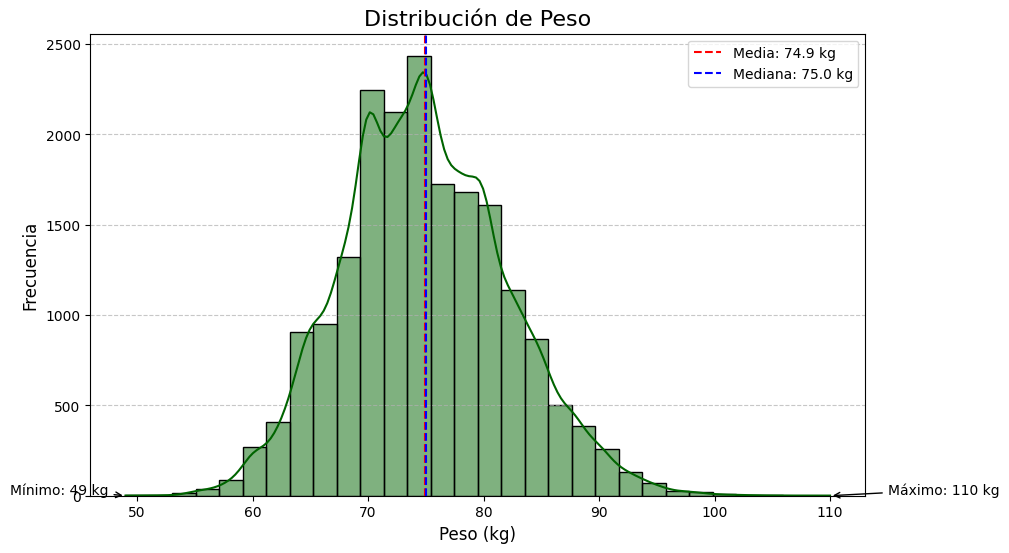

In [50]:
# Calculate key statistics
mean_weight = df["weight_kg"].mean()
median_weight = df["weight_kg"].median()
max_weight = df["weight_kg"].max()
min_weight = df["weight_kg"].min()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df["weight_kg"], kde=True, bins=30, alpha=0.5, edgecolor="black", color="darkgreen")

# Add vertical lines for mean and median
plt.axvline(mean_weight, color="red", linestyle="--", label=f"Media: {mean_weight:.1f} kg")
plt.axvline(median_weight, color="blue", linestyle="--", label=f"Mediana: {median_weight:.1f} kg")

# Annotate max and min values
plt.annotate(f"Máximo: {max_weight} kg", xy=(max_weight, 0), xytext=(max_weight + 5, 10),
             arrowprops=dict(facecolor="black", arrowstyle="->"))
plt.annotate(f"Mínimo: {min_weight} kg", xy=(min_weight, 0), xytext=(min_weight - 10, 10),
             arrowprops=dict(facecolor="black", arrowstyle="->"))

# Add labels, title, grid, and legend
plt.title("Distribución de Peso", fontsize=16)
plt.xlabel("Peso (kg)", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

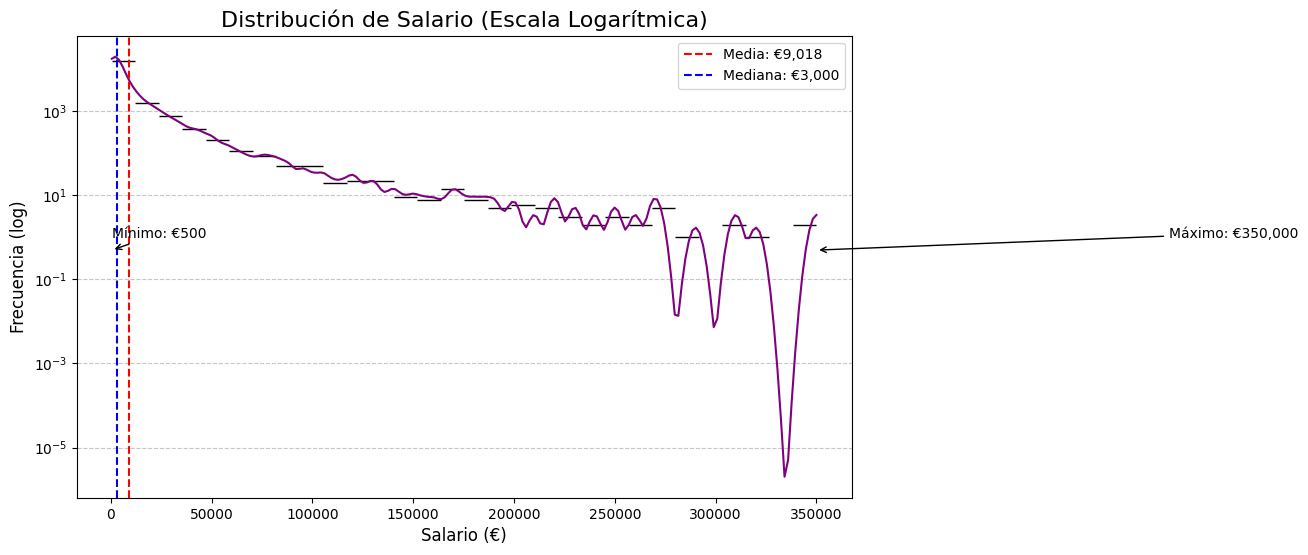

In [51]:
# Improved visualization for salary distribution
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate key statistics
mean_salary = df["wage_eur"].mean()
median_salary = df["wage_eur"].median()
max_salary = df["wage_eur"].max()
min_salary = df["wage_eur"].min()

# Create the plot
plt.figure(figsize=(10, 6))
sns.histplot(df["wage_eur"], kde=True, bins=30, alpha=0.5, edgecolor="black", color="purple", log_scale=(False, True))

# Add vertical lines for mean and median
plt.axvline(mean_salary, color="red", linestyle="--", label=f"Media: €{mean_salary:,.0f}")
plt.axvline(median_salary, color="blue", linestyle="--", label=f"Mediana: €{median_salary:,.0f}")

# Annotate max and min values
plt.annotate(f"Máximo: €{max_salary:,.0f}", xy=(max_salary, 0.5), xytext=(max_salary * 1.5, 1),
             arrowprops=dict(facecolor="black", arrowstyle="->"), fontsize=10)
plt.annotate(f"Mínimo: €{min_salary:,.0f}", xy=(min_salary, 0.5), xytext=(min_salary * 1.5, 1),
             arrowprops=dict(facecolor="black", arrowstyle="->"), fontsize=10)

# Add labels, title, grid, and legend
plt.title("Distribución de Salario (Escala Logarítmica)", fontsize=16)
plt.xlabel("Salario (€)", fontsize=12)
plt.ylabel("Frecuencia (log)", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.legend()
plt.show()

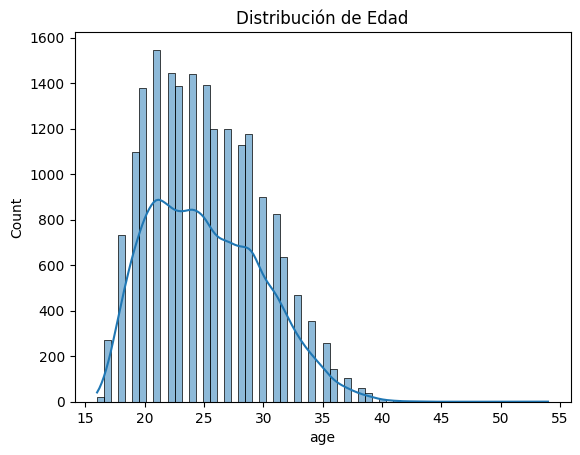

In [12]:
# Edad de los jugadores
sns.histplot(df["age"], kde=True)
plt.title("Distribución de Edad")
plt.show()

## 3.2 Dominancia del pie

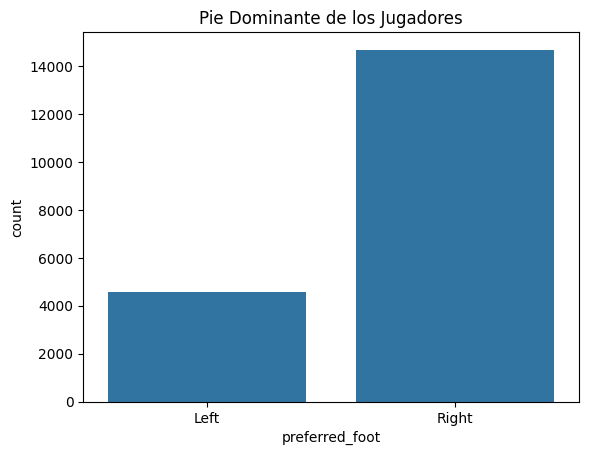

In [13]:
sns.countplot(x="preferred_foot", data=df)
plt.title("Pie Dominante de los Jugadores")
plt.show()

## 3.3 Representación geográfica

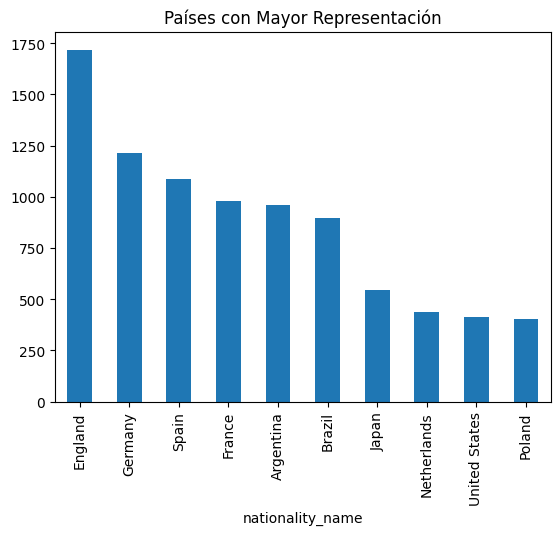

In [14]:
top_countries = df["nationality_name"].value_counts().head(10)
top_countries.plot(kind="bar")
plt.title("Países con Mayor Representación")
plt.show()

## 3.4 Posiciones de los jugadores

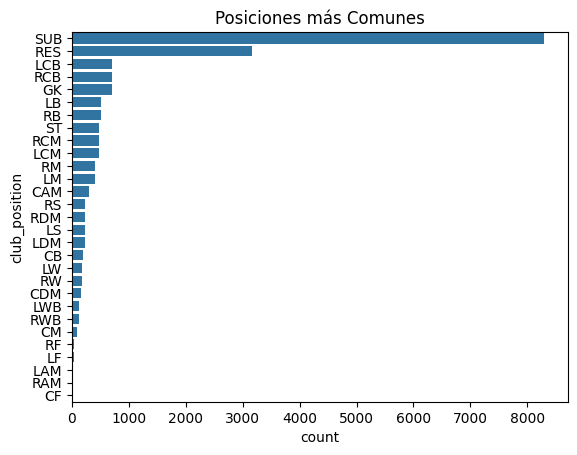

In [15]:
sns.countplot(
    y="club_position", data=df, order=df["club_position"].value_counts().index
)

plt.title("Posiciones más Comunes")

plt.show()

# 4. Relaciones entre variables clave

## 4.1 Potencial vs Salario

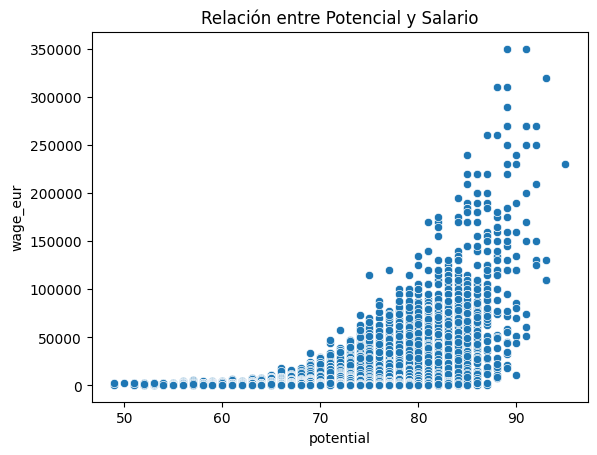

In [16]:
sns.scatterplot(x="potential", y="wage_eur", data=df)
plt.title("Relación entre Potencial y Salario")
plt.show()

## 4.2 Reputación vs Valor de mercado

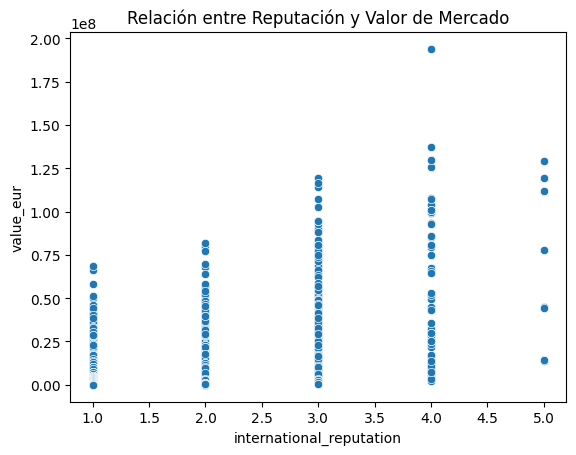

In [17]:
sns.scatterplot(x="international_reputation", y="value_eur", data=df)
plt.title("Relación entre Reputación y Valor de Mercado")
plt.show()

## 4.3 Reputación vs Salario

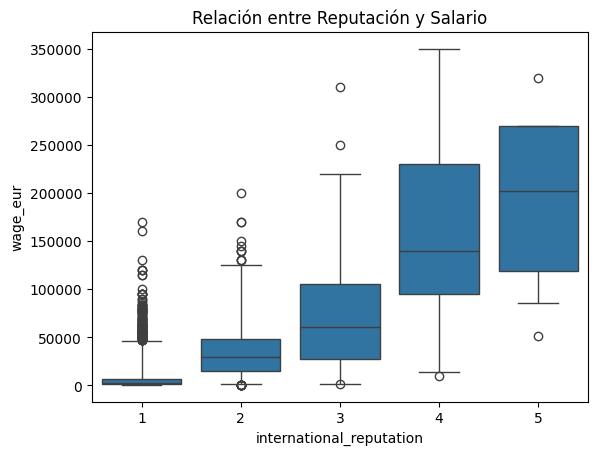

In [18]:
sns.boxplot(x="international_reputation", y="wage_eur", data=df, whis=[1,99])
plt.title("Relación entre Reputación y Salario")
plt.show()

## 4.4 Estatura vs Potencial

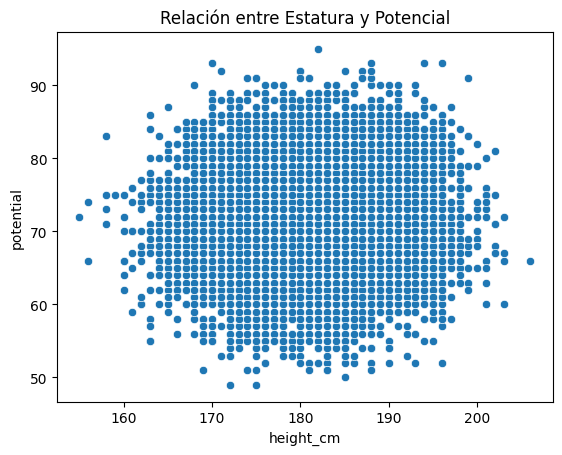

In [19]:
sns.scatterplot(x="height_cm", y="potential", data=df)
plt.title("Relación entre Estatura y Potencial")
plt.show()

# 5. Jugadores destacados

## 5.1 Jugadores mejor remunerados

In [20]:
df[["short_name", "wage_eur"]].sort_values(by="wage_eur", ascending=False).head(10)

,short_name,wage_eur
4,K. De Bruyne,350000.0
11,K. Benzema,350000.0
0,L. Messi,320000.0
24,T. Kroos,310000.0
14,Casemiro,310000.0
27,R. Sterling,290000.0
17,M. Salah,270000.0
16,S. Mané,270000.0
1,R. Lewandowski,270000.0
2,Cristiano Ronaldo,270000.0


## 5.2 Jugadores con mayor potencial

In [21]:
df[["short_name", "potential"]].sort_values(by="potential", ascending=False).head(10)

,short_name,potential
6,K. Mbappé,95
29,E. Haaland,93
21,G. Donnarumma,93
0,L. Messi,93
5,J. Oblak,93
1,R. Lewandowski,92
139,P. Foden,92
8,M. ter Stegen,92
44,T. Alexander-Arnold,92
43,F. de Jong,92


## 5.3 Jugadores con mejor valoración general

In [22]:
df[["short_name", "overall"]].sort_values(by="overall", ascending=False).head(10)

,short_name,overall
0,L. Messi,93
1,R. Lewandowski,92
2,Cristiano Ronaldo,91
3,Neymar Jr,91
4,K. De Bruyne,91
5,J. Oblak,91
6,K. Mbappé,91
10,N. Kanté,90
8,M. ter Stegen,90
7,M. Neuer,90


# 6. Conclusiones

- Se identificaron patrones interesantes en las relaciones entre potencial, salario y reputación.
- La mayoría de los jugadores tienden a ser diestros.
- Determinados países dominan la representación de jugadores.
- Hay correlaciones positivas moderadas entre reputación y valor de mercado.
- Se pueden proponer futuros estudios como predicción del valor de mercado a partir de atributos físicos y técnicos.